In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


# Import TensorFlow and relevant Keras classes to setup the model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
import tensorflow_datasets as tfds
pcam, pcam_info = tfds.load("patch_camelyon", with_info=True)
print(pcam_info)

tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_path='/Users/melody.zhao/tensorflow_datasets/patch_camelyon/2.0.0',
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disabl

2021-11-28 11:07:38.896074: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
pcam

{'test': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 'validation': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>}

In [5]:
pcam_list = list(pcam['train'])

In [6]:
test_photo = pcam_list[0]['image']
test_photo_numpy = test_photo.numpy()

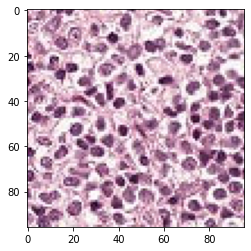

In [7]:
plt.imshow(test_photo)

## Averaging

In [13]:
blur = cv.blur(test_photo_numpy,(5,5))

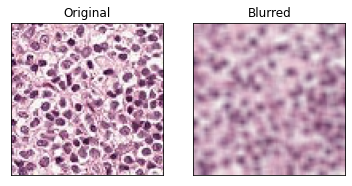

In [14]:
plt.subplot(121),plt.imshow(test_photo_numpy),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

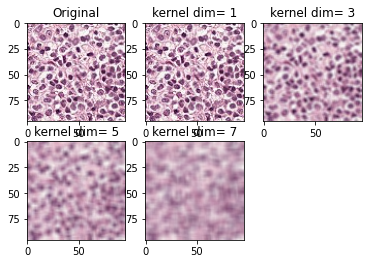

In [23]:
plt.subplot(231),plt.imshow(test_photo_numpy),plt.title('Original')
location = [232, 233, 234, 235]
for i, val in enumerate([1,3,5,7]):
    image_blurred = cv.blur(test_photo_numpy,(val,val))
    plt.subplot(location[i]),plt.imshow(image_blurred), plt.title(f"kernel dim= {val}")
    
    

## Gaussian Filter

In [27]:
gaussian_blur = cv.GaussianBlur(test_photo_numpy,(5,5), 0)

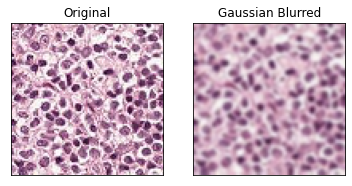

In [28]:
plt.subplot(121),plt.imshow(test_photo_numpy),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_blur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

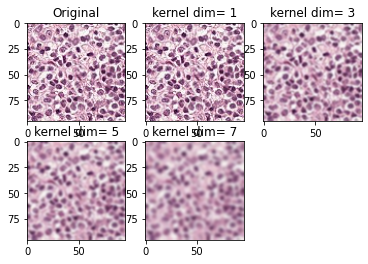

In [30]:
plt.subplot(231),plt.imshow(test_photo_numpy),plt.title('Original')
location = [232, 233, 234, 235]
for i, val in enumerate([1,3,5,7]):
    image_blurred = cv.GaussianBlur(test_photo_numpy,(val,val), 0)
    plt.subplot(location[i]),plt.imshow(image_blurred), plt.title(f"kernel dim= {val}")

## Median Filter

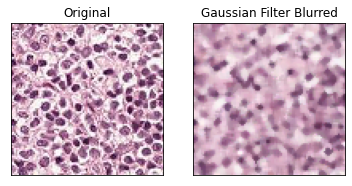

In [15]:
median = cv.medianBlur(test_photo_numpy,5)
plt.subplot(121),plt.imshow(test_photo_numpy),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Gaussian Filter Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

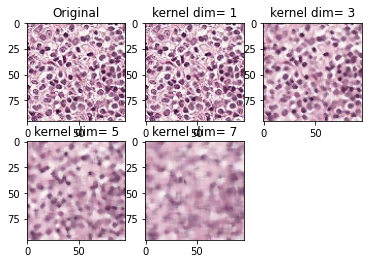

In [24]:
plt.subplot(231),plt.imshow(test_photo_numpy),plt.title('Original')
location = [232, 233, 234, 235]
for i, val in enumerate([1,3,5,7]):
    image_blurred = cv.medianBlur(test_photo_numpy,val)
    plt.subplot(location[i]),plt.imshow(image_blurred), plt.title(f"kernel dim= {val}")

## Bilateral Filter

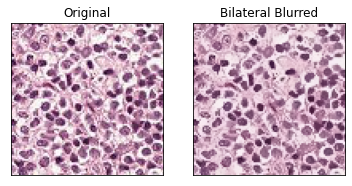

In [46]:
bilateral_blur = cv.bilateralFilter(test_photo_numpy,9,80,80)
plt.subplot(121),plt.imshow(test_photo_numpy),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bilateral_blur),plt.title('Bilateral Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Contrast Filter

In [8]:
test_photo_numpy

array([[[247, 206, 222],
        [236, 197, 216],
        [223, 185, 208],
        ...,
        [252, 213, 232],
        [228, 187, 205],
        [250, 209, 227]],

       [[169, 122, 140],
        [255, 239, 255],
        [204, 160, 185],
        ...,
        [230, 191, 210],
        [210, 171, 190],
        [215, 176, 195]],

       [[206, 153, 173],
        [218, 166, 188],
        [227, 179, 203],
        ...,
        [176, 139, 157],
        [132,  93, 114],
        [158, 119, 140]],

       ...,

       [[199, 156, 186],
        [164, 124, 150],
        [175, 135, 159],
        ...,
        [255, 243, 238],
        [233, 213, 212],
        [255, 246, 245]],

       [[214, 180, 204],
        [177, 146, 164],
        [255, 230, 246],
        ...,
        [249, 238, 236],
        [255, 250, 251],
        [205, 189, 190]],

       [[194, 170, 186],
        [255, 237, 251],
        [225, 202, 212],
        ...,
        [250, 237, 246],
        [255, 247, 255],
        [222, 206, 217]]

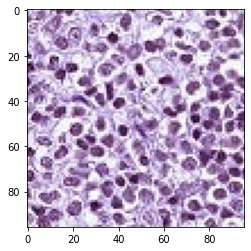

In [18]:
# convert
test_photo_convert = cv.cvtColor(test_photo_numpy, cv2.COLOR_BGR2RGB)
plt.imshow(test_photo_convert)

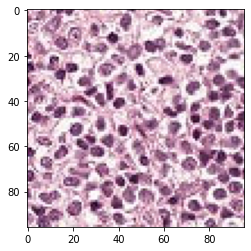

In [19]:
plt.imshow(test_photo_numpy)


In [23]:
img_hsv = cv.cvtColor(test_photo_numpy, cv2.COLOR_RGB2HSV)

# Histogram equalisation on the V-channel
img_hsv[:, :, 2] = cv.equalizeHist(img_hsv[:, :, 2])

# convert image back from HSV to RGB
test_contrast = cv.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

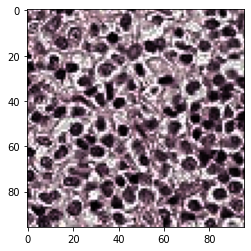

In [24]:
plt.imshow(test_contrast)

In [22]:
test_contrast

array([[[200, 167, 180],
        [180, 150, 165],
        [158, 131, 147],
        ...,
        [209, 177, 193],
        [166, 136, 149],
        [206, 172, 186]],

       [[ 83,  59,  68],
        [255, 239, 254],
        [128, 100, 116],
        ...,
        [169, 140, 154],
        [137, 111, 124],
        [144, 118, 131]],

       [[131,  97, 109],
        [149, 113, 128],
        [164, 129, 146],
        ...,
        [ 91,  71,  81],
        [ 44,  31,  37],
        [ 70,  52,  61]],

       ...,

       [[121,  94, 113],
        [ 77,  58,  70],
        [ 90,  69,  81],
        ...,
        [255, 243, 238],
        [174, 158, 158],
        [255, 246, 245]],

       [[143, 120, 136],
        [ 93,  76,  85],
        [255, 230, 245],
        ...,
        [203, 194, 192],
        [255, 250, 251],
        [129, 118, 119]],

       [[114,  99, 109],
        [255, 237, 250],
        [161, 144, 151],
        ...,
        [206, 195, 202],
        [255, 247, 255],
        [156, 144, 152]]

In [ ]:
def run_histogram_equalization(image_path):
    rgb_img = cv2.imread(image_path)

    # convert from RGB color-space to YCrCb
    ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)

    # equalize the histogram of the Y channel
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

    # convert back to RGB color-space from YCrCb
    equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

    cv2.imshow('equalized_img', equalized_img)
    cv2.waitKey(0)

In [10]:
constrast_photo = cv.equalizeHist(test_photo)

error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'equalizeHist'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


# ML

In [7]:
from PIL import Image
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow and relevant Keras classes to setup the model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
input_img = Input(shape=(96,96,3))

# Now we define the layers of the convolutional network: three blocks of two convolutional layers and a max-pool layer.
x = Conv2D(16, (3, 3), padding='valid', activation='relu')(input_img)
x = Conv2D(16, (3, 3), padding='valid', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3, 3), padding='valid', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='valid', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3, 3), padding='valid', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='valid', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Now we flatten the output from a 4D to a 2D tensor to be able to use fully-connected (dense) layers for the final
# classification part. Here we also use a bit of dropout for regularization. The last layer uses a softmax to obtain class
# likelihoods (i.e. metastasis vs. non-metastasis)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
predictions = Dense(2, activation='softmax')(x)

# Now we define the inputs/outputs of the model and setup the optimizer. In this case we use regular stochastic gradient
# descent with Nesterov momentum. The loss we use is cross-entropy and we would like to output accuracy as an additional metric.
model = Model(inputs=input_img, outputs=predictions)
sgd_opt = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
model.compile(optimizer=sgd_opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 32)        9248      
                                                             

/Users/melody.zhao/opt/anaconda3/envs/patch/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
list_train = list(pcam['train'])

In [10]:
list_img = [list_train[i]['image'] for i in range(len(list_train))]

In [32]:
list_img[0]

<tf.Tensor: shape=(96, 96, 3), dtype=uint8, numpy=
array([[[247, 206, 222],
        [236, 197, 216],
        [223, 185, 208],
        ...,
        [252, 213, 232],
        [228, 187, 205],
        [250, 209, 227]],

       [[169, 122, 140],
        [255, 239, 255],
        [204, 160, 185],
        ...,
        [230, 191, 210],
        [210, 171, 190],
        [215, 176, 195]],

       [[206, 153, 173],
        [218, 166, 188],
        [227, 179, 203],
        ...,
        [176, 139, 157],
        [132,  93, 114],
        [158, 119, 140]],

       ...,

       [[199, 156, 186],
        [164, 124, 150],
        [175, 135, 159],
        ...,
        [255, 243, 238],
        [233, 213, 212],
        [255, 246, 245]],

       [[214, 180, 204],
        [177, 146, 164],
        [255, 230, 246],
        ...,
        [249, 238, 236],
        [255, 250, 251],
        [205, 189, 190]],

       [[194, 170, 186],
        [255, 237, 251],
        [225, 202, 212],
        ...,
        [250, 237, 246]

In [11]:
list_label = [list_train[i]['label'] for i in range(len(list_train))]

In [22]:
list_label[:100]

[<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64

In [12]:
list_label_convert = []
for i, label in enumerate(list_label):
    try:
        list_label_convert.append(tf.one_hot(int(label), 2, dtype=tf.float32))
    except TypeError:
        list_label_convert.append(list_label[0])

In [13]:
list_image_convert = []
for image in list_img:
    blurred = cv.bilateralFilter(image.numpy(),9,80,80)
    list_image_convert += [tf.convert_to_tensor(blurred, dtype=tf.float32)]

In [14]:
def convert_sample(sample):
    image, label = sample['image'], sample['label'] 
#     image = preprocess_content(image)
#     image = hub_model(tf.constant(image), tf.constant(style_image))[0]
#     image = tensor_to_image(stylized_image_)
    image = tf.image.convert_image_dtype(image, tf.float32)
    label = tf.one_hot(label, 2, dtype=tf.float32)
    return image, label

In [15]:
dataset_transformed = tf.data.Dataset.from_tensor_slices((list_image_convert, list_label_convert))
train_pipeline = dataset_transformed.shuffle(1024).repeat().batch(64).prefetch(2)

In [16]:
list_test = list(pcam['test'])

In [17]:
test_img = [list_test[i]['image'] for i in range(len(list_test))]
test_label = [list_test[i]['label'] for i in range(len(list_test))]

In [25]:
test_img[:10]

[<tf.Tensor: shape=(96, 96, 3), dtype=uint8, numpy=
 array([[[146,  77, 170],
         [177, 107, 195],
         [208, 141, 220],
         ...,
         [ 29,  20, 101],
         [133,  85, 187],
         [109,  26, 144]],
 
        [[153,  88, 168],
         [173, 111, 186],
         [230, 175, 243],
         ...,
         [ 40,  32, 115],
         [ 69,  28, 130],
         [110,  42, 155]],
 
        [[186, 126, 190],
         [203, 153, 212],
         [212, 173, 230],
         ...,
         [ 20,  10,  97],
         [100,  70, 168],
         [102,  50, 158]],
 
        ...,
 
        [[ 42,  22, 107],
         [ 58,  19, 110],
         [ 98,  42, 139],
         ...,
         [ 76,  43, 134],
         [ 84,  52, 149],
         [ 81,  51, 151]],
 
        [[ 51,  31, 130],
         [ 71,  29, 131],
         [111,  53, 156],
         ...,
         [ 93,  63, 149],
         [ 73,  47, 138],
         [ 60,  35, 129]],
 
        [[ 79,  60, 167],
         [ 75,  31, 142],
         [104,  

In [18]:
test_image_convert = []
for i, img in enumerate(test_img):
    blurred = cv.bilateralFilter(image.numpy(),9,80,80)
    test_image_convert += [tf.convert_to_tensor(blurred, dtype=tf.float32)]
    
test_label_convert = []
for i, label in enumerate(test_label):
    try:
        test_label_convert.append(tf.one_hot(int(label), 2, dtype=tf.float32))
    except TypeError:
        test_label_convert.append(list_label[0])

In [19]:
test_transformed = tf.data.Dataset.from_tensor_slices((test_image_convert, test_label_convert))

In [26]:
test_transformed

<TensorSliceDataset shapes: ((96, 96, 3), (2,)), types: (tf.float32, tf.float32)>

In [30]:
test_pipeline = test_transformed.shuffle(1024).repeat().batch(64).prefetch(2)
test_pipeline

<PrefetchDataset shapes: ((None, 96, 96, 3), (None, 2)), types: (tf.float32, tf.float32)>

In [21]:
hist = model.fit(train_pipeline,
                 validation_data=validation_pipeline,
                 verbose=2, epochs=5, steps_per_epoch=10, validation_steps=10)

Epoch 1/5
10/10 - 6s - loss: nan - accuracy: 0.4734 - val_loss: nan - val_accuracy: 0.5359 - 6s/epoch - 593ms/step
Epoch 2/5
10/10 - 5s - loss: nan - accuracy: 0.5297 - val_loss: nan - val_accuracy: 0.5172 - 5s/epoch - 528ms/step
Epoch 3/5
10/10 - 6s - loss: nan - accuracy: 0.4922 - val_loss: nan - val_accuracy: 0.5281 - 6s/epoch - 564ms/step
Epoch 4/5
10/10 - 5s - loss: nan - accuracy: 0.4781 - val_loss: nan - val_accuracy: 0.5141 - 5s/epoch - 523ms/step
Epoch 5/5
10/10 - 9s - loss: nan - accuracy: 0.4672 - val_loss: nan - val_accuracy: 0.5437 - 9s/epoch - 867ms/step


In [27]:
train_pipeline2 = pcam['train'].map(convert_sample,
                                   num_parallel_calls=8).shuffle(1024).repeat().batch(64).prefetch(2)
valid_pipeline2 = pcam['validation'].map(convert_sample,
                                        num_parallel_calls=8).repeat().batch(128).prefetch(2)

In [31]:
train_pipeline2

<PrefetchDataset shapes: ((None, 96, 96, 3), (None, 2)), types: (tf.float32, tf.float32)>

In [64]:
hist = model.fit(train_pipeline,
                 validation_data=validation_pipeline,
                 verbose=2, epochs=5, steps_per_epoch=1028, validation_steps=256)

Epoch 1/5
1028/1028 - 297s - loss: 0.6882 - accuracy: 0.5329 - val_loss: 72.5993 - val_accuracy: 0.5701 - 297s/epoch - 289ms/step
Epoch 2/5
1028/1028 - 297s - loss: 0.6927 - accuracy: 0.5054 - val_loss: 38.0956 - val_accuracy: 0.5699 - 297s/epoch - 289ms/step
Epoch 3/5
1028/1028 - 293s - loss: 0.6934 - accuracy: 0.5007 - val_loss: 39.6422 - val_accuracy: 0.5699 - 293s/epoch - 285ms/step
Epoch 4/5
1028/1028 - 296s - loss: 0.6934 - accuracy: 0.5014 - val_loss: 49.6331 - val_accuracy: 0.5698 - 296s/epoch - 288ms/step
Epoch 5/5
1028/1028 - 376s - loss: 0.6922 - accuracy: 0.5128 - val_loss: 64.1706 - val_accuracy: 0.5699 - 376s/epoch - 366ms/step
